In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('')
df.head()

,A,B,C,D,E,F,G,H,I,J,Response
0,13.827771,1.056140,0.505004,-0.543195,-0.027172,0.594074,0.386825,1.037363,white,female,-0.946529
1,-179.048227,-1.573780,-0.210798,-1.658094,-0.566987,0.938666,1.759363,0.878232,black,female,-0.849783
2,189.705718,-0.509389,0.077754,0.490482,-0.044521,-0.404194,0.078311,-0.218869,white,female,1.950549
3,24.787683,0.866400,0.894109,1.477050,-0.560026,-0.556511,-0.039471,1.168201,black,male,0.846600
4,-110.578410,1.688742,1.892392,-0.662046,-1.409103,-0.698002,0.444821,1.386956,white,male,-1.558558


## Problem 1

In [3]:
print(df.shape)

(2000, 11)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A         2000 non-null   float64
 1   B         2000 non-null   float64
 2   C         2000 non-null   float64
 3   D         2000 non-null   float64
 4   E         2000 non-null   float64
 5   F         2000 non-null   float64
 6   G         2000 non-null   float64
 7   H         2000 non-null   float64
 8   I         1999 non-null   object 
 9   J         1999 non-null   object 
 10  Response  2000 non-null   float64
dtypes: float64(9), object(2)
memory usage: 172.0+ KB


In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A         1998 non-null   float64
 1   B         1998 non-null   float64
 2   C         1998 non-null   float64
 3   D         1998 non-null   float64
 4   E         1998 non-null   float64
 5   F         1998 non-null   float64
 6   G         1998 non-null   float64
 7   H         1998 non-null   float64
 8   I         1998 non-null   object 
 9   J         1998 non-null   object 
 10  Response  1998 non-null   float64
dtypes: float64(9), object(2)
memory usage: 187.3+ KB


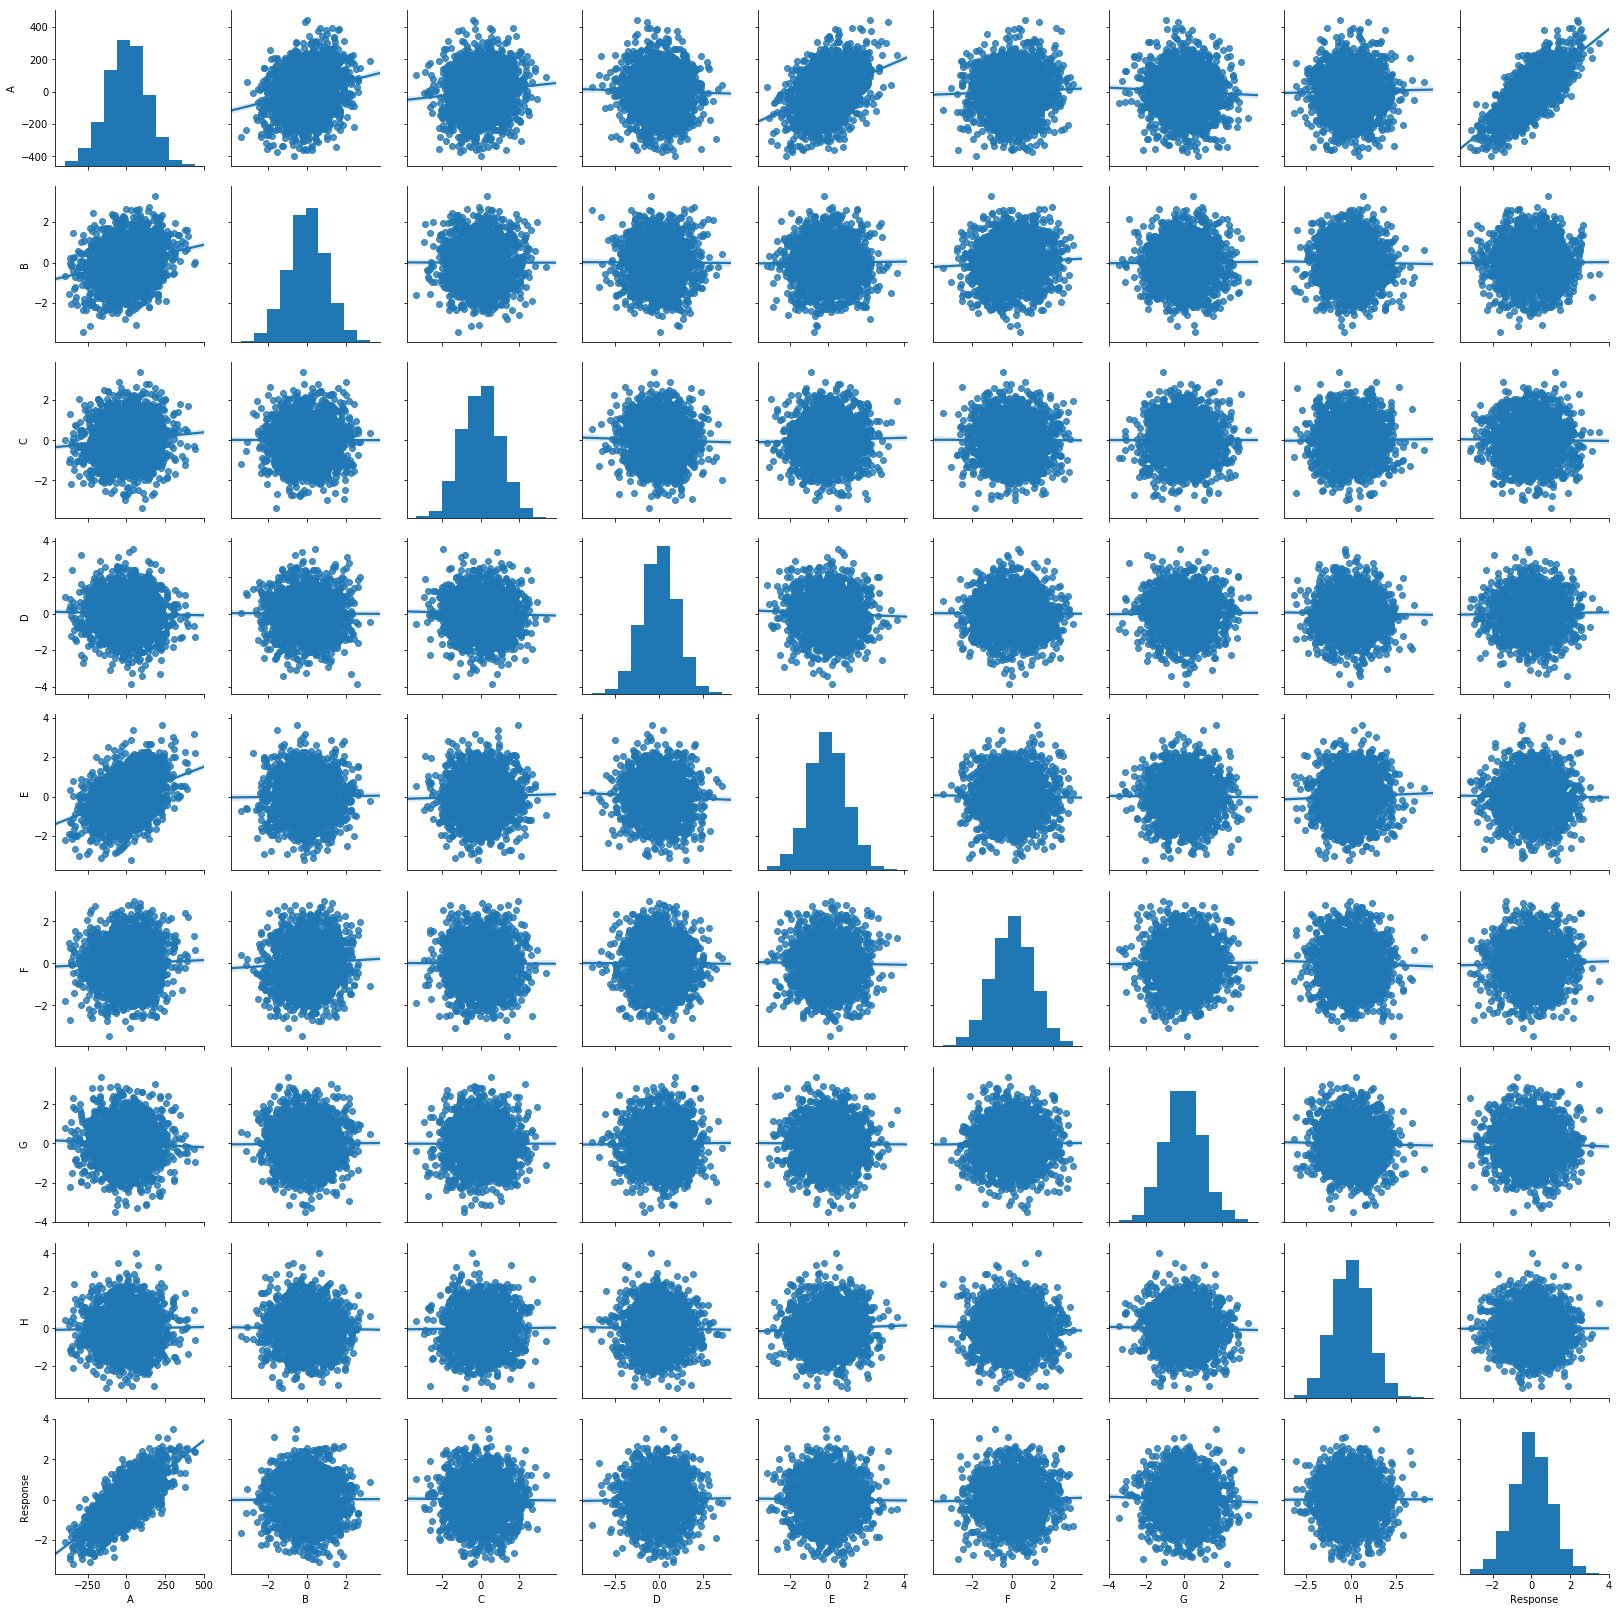

In [6]:
sns.pairplot(df.drop(columns=['I', 'J']), kind = 'reg')

In [7]:
df.I.value_counts(normalize=True)

black    0.5
white    0.5
Name: I, dtype: float64

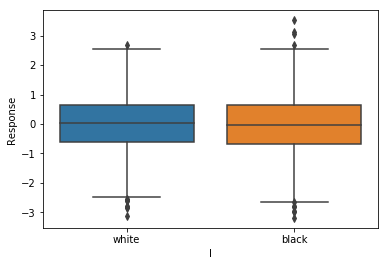

In [8]:
sns.boxplot(df.I, df.Response, data=df, orient='v')

In [9]:
df.J.value_counts(normalize=True)

female    0.500501
male      0.499499
Name: J, dtype: float64

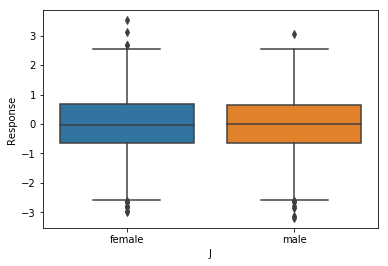

In [10]:
sns.boxplot(df.J, df.Response, data=df, orient='v')

## Problem 2

In [11]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [12]:
model_A = smf.ols(formula="Response ~"+'+'.join(df.columns[:-1]), data=df).fit()

In [13]:
model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1442.
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:00:30   Log-Likelihood:                -747.93
No. Observations:                1998   AIC:                             1518.
Df Residuals:                    1987   BIC:                             1579.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4207      0.014     30.000      0.000       0.393       0.448
I[T.white]    -0.8720      0.018    -49.744      0.000      -0.906      -0.838
J[T.male]      0.0195      0.016      1.234      0.217      -0.011       0.051
A              0.0092   7.65e-05    119.876      0.000       0.009       0.009
B             -0.2446      0.008    -29.606      0.000      -0.261      -0.228
C             -0.1318      0.008    -16.230      0.000      -0.148      -0.116
D              0.0116      0.008      1.493      0.136      -0.004       0.027
E             -0.4664      0.009    -53.191      0.000      -0.484      -0.449
F             -0.0054      0.008     -0.694      0.488      -0.021       0.010
G              0.0068      0.008      0.875      0.382      -0.008       0.022
H             -0.0017      0.008     -0.215      0.830      -0.017       0.014
==============================================================================
Omnibus:                       25.778   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.818
Skew:                          -0.119   Prob(JB):                     3.72e-09
Kurtosis:                       3.640   Cond. No.                         342.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model_B = smf.ols(formula="Response ~ A+B+C+E+I", data=df).fit()

In [15]:
model_B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     2882.
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:00:31   Log-Likelihood:                -750.40
No. Observations:                1998   AIC:                             1513.
Df Residuals:                    1992   BIC:                             1546.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4304      0.012     36.570      0.000       0.407       0.454
I[T.white]    -0.8721      0.018    -49.792      0.000      -0.906      -0.838
A              0.0092   7.63e-05    120.010      0.000       0.009       0.009
B             -0.2448      0.008    -29.677      0.000      -0.261      -0.229
C             -0.1318      0.008    -16.242      0.000      -0.148      -0.116
E             -0.4666      0.009    -53.312      0.000      -0.484      -0.449
==============================================================================
Omnibus:                       24.832   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.910
Skew:                          -0.118   Prob(JB):                     9.66e-09
Kurtosis:                       3.622   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [17]:
df_num = pd.get_dummies(df, drop_first = True)
df_num.head()

,A,B,C,D,E,F,G,H,Response,I_white,J_male
0,13.827771,1.056140,0.505004,-0.543195,-0.027172,0.594074,0.386825,1.037363,-0.946529,1,0
1,-179.048227,-1.573780,-0.210798,-1.658094,-0.566987,0.938666,1.759363,0.878232,-0.849783,0,0
2,189.705718,-0.509389,0.077754,0.490482,-0.044521,-0.404194,0.078311,-0.218869,1.950549,1,0
3,24.787683,0.866400,0.894109,1.477050,-0.560026,-0.556511,-0.039471,1.168201,0.846600,0,1
4,-110.578410,1.688742,1.892392,-0.662046,-1.409103,-0.698002,0.444821,1.386956,-1.558558,1,1


In [18]:
X = df_num.drop(columns='Response')
y = df_num.Response
n = X.shape[0]

In [19]:
lr = LinearRegression()
model_A_r2 = cross_val_score(lr, X, y, cv=10, scoring='r2')
model_A_r2_adj = [1 - (1 - r2)*((n-1)/(n - X.shape[1]- 1)) for r2 in model_A_r2]

In [38]:
lr = LinearRegression()
model_B_r2 = cross_val_score(lr, X[['A', 'B', 'C', 'E', 'I_white']], y, cv=10, scoring='r2')
model_B_r2_adj = [1 - (1 - r2)*((n-1)/(n - 5 - 1)) for r2 in model_B_r2]

In [21]:
np.mean(model_A_r2), np.mean(model_A_r2_adj)

(0.8763518665105081, 0.8757295809871591)

In [39]:
np.mean(model_B_r2), np.mean(model_B_r2_adj)

(0.8766218294852388, 0.8763121453223002)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
X_b = X[['A', 'B', 'C', 'E', 'I_white']]

In [42]:
for j in np.arange(X_b.shape[1]):
    print(X_b.columns[j], "       VIF->", variance_inflation_factor(X_b.values,j))

A        VIF-> 1.4040278180353707
B        VIF-> 1.0680996073976536
C        VIF-> 1.0132483360185138
E        VIF-> 1.2076802051828448
I_white        VIF-> 1.107326269637801


In [26]:
model_C = model_B

In [27]:
import lmdiag

<module 'matplotlib.pyplot' from 'C:\\Users\\ADStudent\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

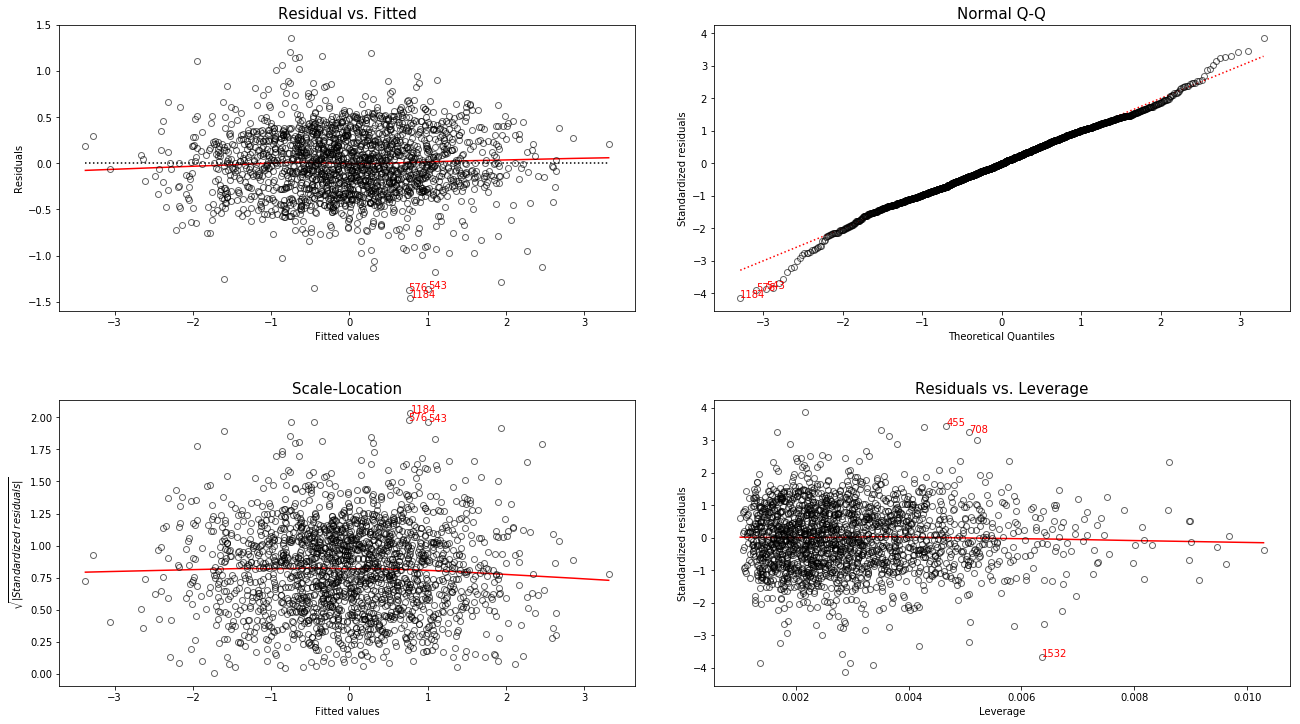

In [28]:
plt.figure(figsize=(18,10))
lmdiag.plot(model_C) 

## Problem 3

In [29]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [30]:
L = LassoCV(n_alphas = 500, cv = 10, max_iter = 10000, normalize=True)
L.fit(X,y)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=500, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [31]:
print('Optimal lambda is', L.alpha_)

Optimal lambda is 2.762499331582019e-05


In [32]:
print('Coefficients of model L are the following')
list(zip(X.columns, L.coef_))

Coefficients of model L are the following


[('A', 0.009133827388864382),
 ('B', -0.24260847003359576),
 ('C', -0.13010129345286797),
 ('D', 0.01056111703478408),
 ('E', -0.46367696559597027),
 ('F', -0.0041327513059739186),
 ('G', 0.0054709657722759415),
 ('H', -0.0005131351378380741),
 ('I_white', -0.8664723759672952),
 ('J_male', 0.016717153463644593)]

In [33]:
lasso_l = Lasso(alpha=L.alpha_)

In [34]:
model_L_r2 = cross_val_score(lasso_l, X, y, cv=10, scoring='r2')
model_L_r2_adj = [1 - (1 - r2)*((n-1)/(n - X.shape[1]- 1)) for r2 in model_L_r2]

In [35]:
model_C_r2 = model_B_r2
model_C_r2_adj = model_B_r2_adj

In [36]:
np.mean(model_C_r2), np.mean(model_C_r2_adj)

(0.8766218294852388, 0.8760009026079627)

In [37]:
np.mean(model_L_r2), np.mean(model_L_r2_adj)

(0.8763527065940069, 0.8757304252985566)